In [1]:
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import torch
from torchvision import transforms
from PIL import Image

2023-11-15 11:29:26.068769: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 11:29:26.087900: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 11:29:26.087916: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 11:29:26.087936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 11:29:26.092054: I tensorflow/core/platform/cpu_feature_g

In [2]:
pipe_prior = KandinskyV22PriorPipeline.from_pretrained("kandinsky-community/kandinsky-2-2-prior")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
pipe = KandinskyV22Pipeline.from_pretrained("kandinsky-community/kandinsky-2-2-decoder")

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
movq = pipe.movq

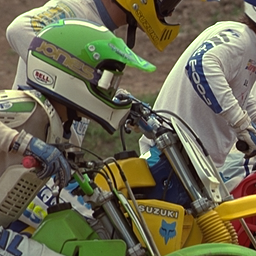

In [5]:
encode_transform = transforms.Compose(
    [
        # transforms.Resize(256, interpolation=transforms.InterpolationMode.BILINEAR),
        # transforms.CenterCrop(256),
        transforms.ToTensor(),
    ]
)
image = Image.open("kodim05.png").crop((20,20,276,276))
# image = Image.open("kodim05.png")
pixel_values = encode_transform(image).unsqueeze(0)
image

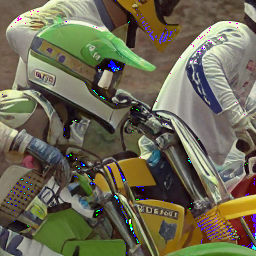

In [6]:
z = movq.encode(pixel_values)
x̂ = movq.decode(z[0])
transforms.ToPILImage()(x̂[0][0])

In [13]:
z[0].shape

torch.Size([1, 4, 64, 96])

In [19]:
x̂[0].shape

torch.Size([1, 3, 512, 768])